# load data & library

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
train = pd.read_csv("titanic/train.csv", index_col="PassengerId")
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
test = pd.read_csv("titanic/test.csv", index_col="PassengerId")
print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# label 빈도수

<AxesSubplot:xlabel='Survived', ylabel='count'>

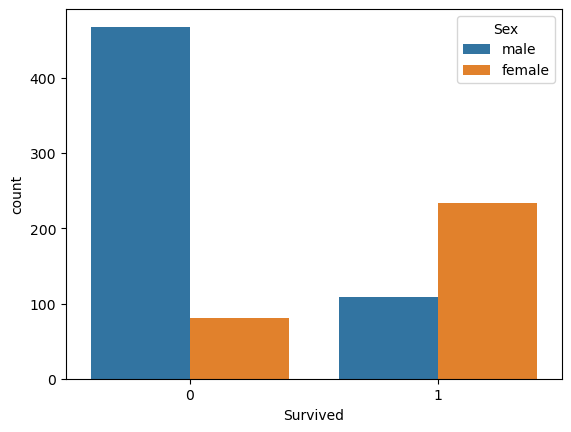

In [35]:
sns.countplot(data=train, x="Survived", hue="Sex")

# 결측치 조회, 시각화 

In [36]:
train.isnull().mean() * 100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [37]:
test.isnull().mean() * 100

Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         20.574163
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.239234
Cabin       78.229665
Embarked     0.000000
dtype: float64

# feature names & label 

In [38]:
label = "Survived"
label

'Survived'

In [39]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [40]:
train.select_dtypes(include="number")

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000
888,1,1,19.0,0,0,30.0000
889,0,3,NaN,1,2,23.4500


In [41]:
train.select_dtypes(include="number").columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [42]:
train["Gender"] = train["Sex"] == 'female'
test["Gender"] = test["Sex"] == 'female'

In [43]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [44]:
feature_names = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Gender"]
feature_names

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender']

# feature names의 결측치 처리 : 0으로 만들기

## train 결측치 

In [45]:
train[feature_names].isnull().sum()

Pclass      0
Age       177
SibSp       0
Parch       0
Fare        0
Gender      0
dtype: int64

In [55]:
train[feature_names].isnull().sum().sum()

177

In [54]:
X_train = train[feature_names].fillna(0)
X_train[feature_names].isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
Gender    0
dtype: int64

In [51]:
train[label].isnull().sum()

0

In [52]:
y_train = train[label]
y_train.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

## test 결측치 

In [47]:
test[feature_names].isnull().sum()

Pclass     0
Age       86
SibSp      0
Parch      0
Fare       1
Gender     0
dtype: int64

In [57]:
X_test = test[feature_names].fillna(0)
print(X_test.shape)
X_test[feature_names].isnull().sum().sum()

(418, 6)


0

# ML Model

In [85]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model

DecisionTreeClassifier(criterion='entropy', random_state=42)

# 학습

In [87]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

# 예측

In [88]:
y_predict = model.predict(X_test)
y_predict

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# 중간 제출
* score = 70 : python0501 제출 파일보다 낮은 점수 기록
* feature engineering 많이 할수록 점수 보장 X, 더 낮아질 수 있음

In [89]:
submit = pd.read_csv("titanic/gender_submission.csv", index_col="PassengerId")
submit.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [90]:
submit["Survived"]

PassengerId
892     0
893     1
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64

In [91]:
submit["Survived"] = y_predict

In [92]:
submit.to_csv("titanic/submit2.csv")

In [93]:
pd.read_csv("titanic/submit2.csv").head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


# 엔트로피

In [94]:
np.log2(2)

1.0

In [95]:
np.log2(4)

2.0

In [96]:
# 모든 로그는 1일 때 0
np.log2(1)

0.0

In [97]:
# 1보다 작은 양수일 경우 y < 0
np.log2(0.2)

-2.321928094887362

In [98]:
# 엔트로프 - 불확실성이 높을 때, 최악일 때
- ((1/2) * np.log2(1/2) + (1/2) * np.log2(1/2))

1.0

In [99]:
# 엔트로프 - 확실하게 구분이 될 때, 불확실성이 낮음
- ((1/2) * np.log2(2/2) + (0/2) * np.log2(1/2))

-0.0

In [100]:
# 두 종류의 데이터가 50개 중에 1개 & 50개 중 49개
- ((1/50) * np.log2(1/50) + (49/50) * np.log2(49/50))

0.14144054254182067

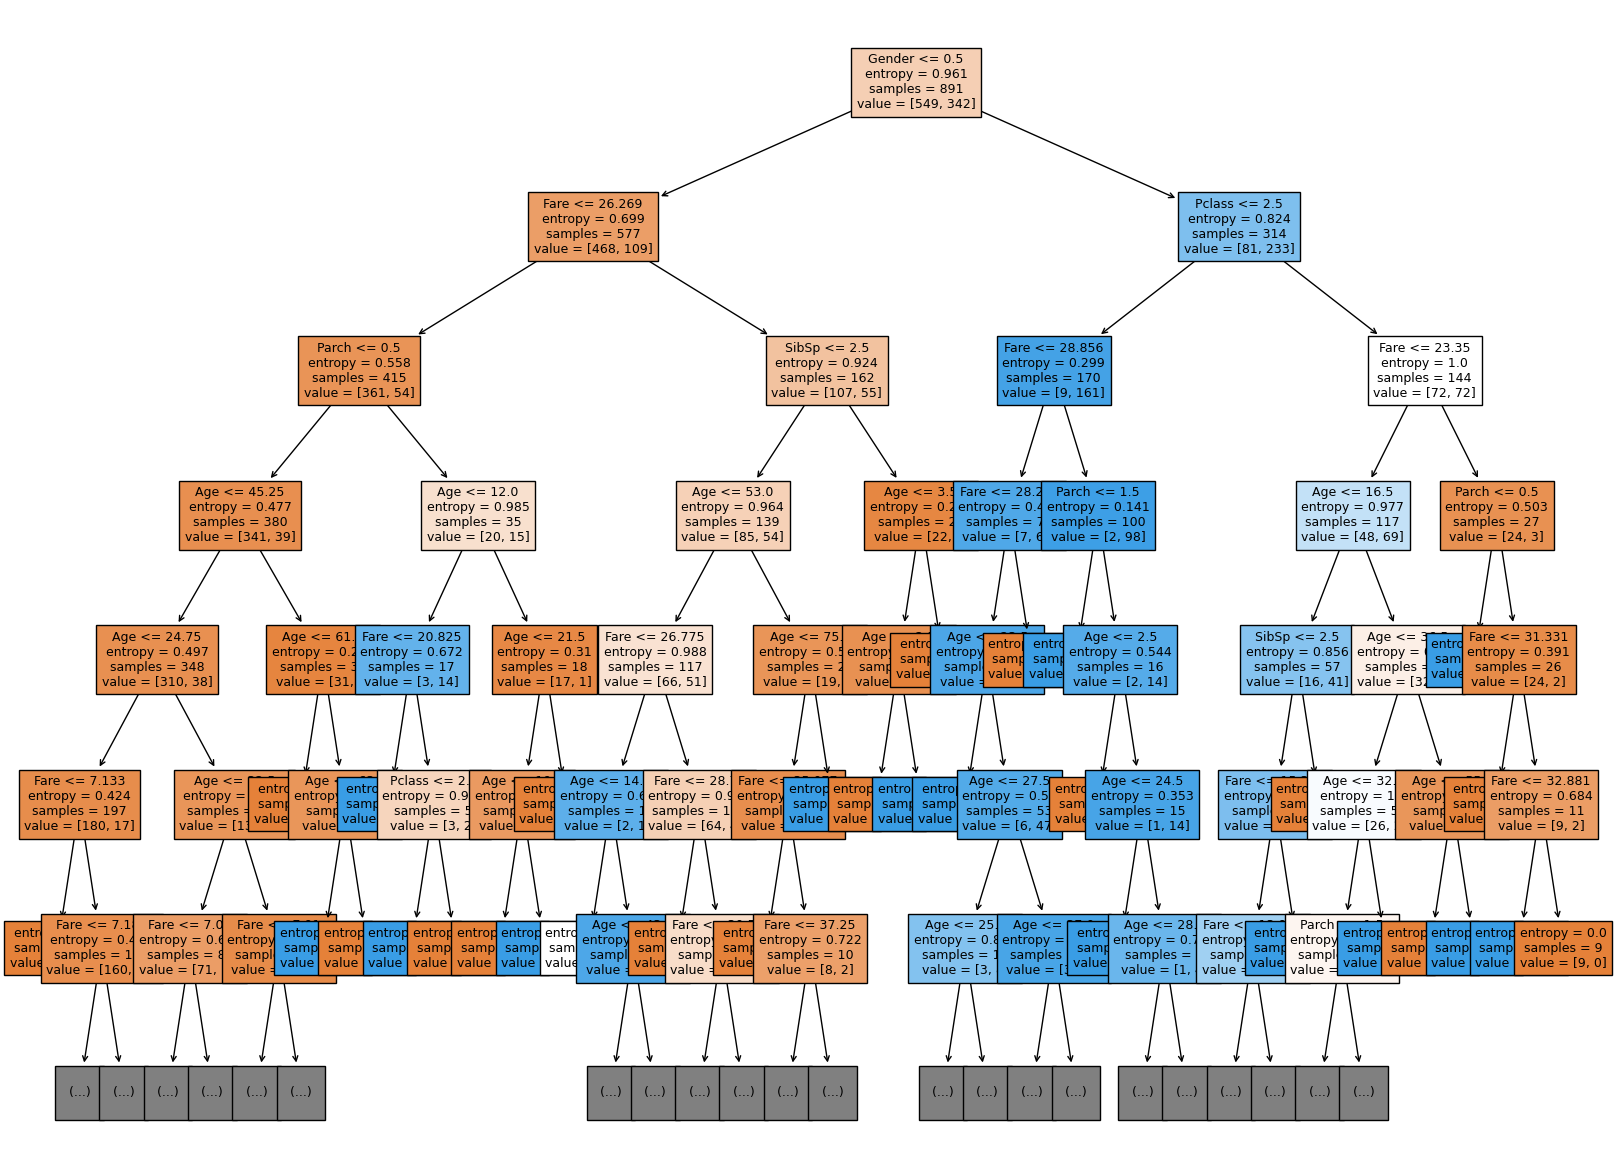

In [108]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(model, max_depth=6, fontsize=9, filled=True, feature_names=feature_names)
plt.show()

In [103]:
# 루트노드의 지니 불순도
1 - (549/891) ** 2 - (342/891) ** 2

0.4730129578614428

In [107]:
# 루트노드의 엔트로피
-((549/891) * np.log2(549/891) + (342/891) * np.log2(342/891))

0.9607079018756469

# 클래스가 3개일 경우?

In [109]:
# 최악의 경우
- ((1/3) * np.log2(1/3) + (1/3) * np.log2(1/3) + (1/3) * np.log2(1/3))

1.584962500721156

In [110]:
# 최댓값
np.log2(3)

1.584962500721156

In [125]:
# 최상의 경우
- ((3/3) * np.log2(3/3) + (0/3) * np.log2(1/3) + (0/3) * np.log2(1/3))

-0.0

# feature importances 

<AxesSubplot:>

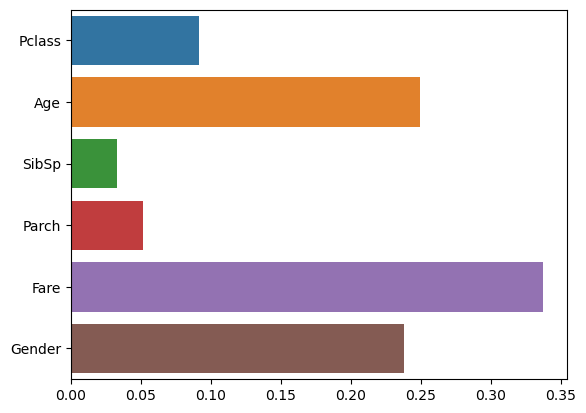

In [122]:
sns.barplot(x=model.feature_importances_, y=model.feature_names_in_)